In [1]:
import numpy as np
from numpy import array
import math

import tensorflow as tf

import pandas as pd 
from pandas import DataFrame
from pandas import concat
from datetime import datetime
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt

from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

plt.style.use('ggplot')

In [2]:
input_data = pd.read_csv (r'C:/Users/Geraldo Wibowo/Desktop/Year 4/FYP/JUPYTER TEST 1/11_5_2020/input3.csv', index_col = 0)
input_data.index.name = 'Timestamp (seconds)'
output_data = pd.read_csv (r'C:/Users/Geraldo Wibowo/Desktop/Year 4/FYP/JUPYTER TEST 1/11_5_2020/output3.csv', index_col = 0)
output_data.index.name = 'Timestamp (seconds)'

In [3]:
split_columns = 1

In [4]:
#output_data = np.array(output_data)
#print(output_data.shape)

#output_data = np.array(output_data)

#Y = list()

#for i in range((int(split_columns/2)),output_data.shape[0], split_columns):
#    Y.append(output_data[i])

#Y = array(Y)
#print(Y.shape)

#DECODING Y
# integer encode direction
#encoder = LabelEncoder()
#Y = encoder.fit_transform(Y)
#print(Y.shape)

In [5]:
#Modifying the output_data to, putting to Y in array
#1 0 0 for normal
#0 1 0 for drowsy
#0 0 1 for aggressive

output_data = np.array(output_data)

Y = list()

for i in range(int(output_data.shape[0]/split_columns)):
    condition = output_data[(i*split_columns)]    
    behavior = []
    if(condition=='DROWSY'):
        behavior = [0,1,0]
    elif(condition=='AGGRESSIVE'):
        behavior = [0,0,1]
    else:
        behavior = [1,0,0]
    
    Y.append(behavior)

Y = array(Y)
print(Y.shape)

(30929, 3)


In [6]:
#min max scaler
X = input_data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X.shape)
print(Y.shape)

(30929, 28)
(30929, 3)


In [7]:
#USE THIS IF MINMAX SCALER IS NOT USED
#X = np.array(X)
#X = np.reshape(X,(int(X.shape[0]/split_columns),split_columns,X.shape[1]))
#print(X.shape)

# RESHAPING X

In [8]:
#RESHAPING X
# X = np.reshape(X,(int(X.shape[0]/split_columns),split_columns,X.shape[1]))
# print(X.shape)

In [9]:
#SPLITTING TRAINING AND TEST DATA METHOD 1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [10]:
#SPLITTING TRAINING AND TEST DATA METHOD 2
#X_train = X[:(int(X.shape[0] * 0.8)),:,:]
#X_test = X[(int(X.shape[0] * 0.8)):,:,:]
print(X_train.shape)
print(X_test.shape)
#Y_train = Y[:(int(Y.shape[0] * 0.8)),:]
#Y_test = Y[(int(Y.shape[0] * 0.8)):,:]
print(Y_train.shape)
print(Y_test.shape)

(24743, 28)
(6186, 28)
(24743, 3)
(6186, 3)


In [11]:
#MAKING SURE DATA TYPE ARE CORRECT
X_train = np.asarray(X_train).astype('float32')
Y_train = np.asarray(Y_train).astype('float32')

# NEURAL NETWORK

In [12]:
#RESHAPING X_TRAIN
# nsamples, nx, ny = X_train.shape
# X_train2 = X_train.reshape((nsamples,nx*ny))
# #THIS NUMBER IS THE INPUT LAYER (23200)
# print(X_train2.shape)
#RESHAPING X_TEST
# nsamples, nx, ny = X_test.shape
# X_test2 = X_test.reshape((nsamples,nx*ny))

In [13]:
# #DROPOUT TO REDUCE OVERFITTING
# layer = tf.keras.layers.Dropout(0.01, input_shape = X_train.shape)
# X_train = layer(X_train, training = True)

In [14]:
#calling the neural network function, choose activation, solver, hidden layer, randomize data 
nn = MLPClassifier(activation='relu',solver='adam',hidden_layer_sizes=(200,200,200),random_state=1,verbose = 1)

In [15]:
t1= datetime.now()
print('start time: ' + str(t1))
nn.fit(X_train,Y_train)

start time: 2020-11-26 01:31:02.828227
Iteration 1, loss = 1.70723352
Iteration 2, loss = 1.41396722
Iteration 3, loss = 1.26729717
Iteration 4, loss = 1.12429387
Iteration 5, loss = 1.03370266
Iteration 6, loss = 0.96909427
Iteration 7, loss = 0.90504299
Iteration 8, loss = 0.84142479
Iteration 9, loss = 0.79960992
Iteration 10, loss = 0.74887652
Iteration 11, loss = 0.68898426
Iteration 12, loss = 0.68889584
Iteration 13, loss = 0.61518920
Iteration 14, loss = 0.59506638
Iteration 15, loss = 0.57356442
Iteration 16, loss = 0.54947512
Iteration 17, loss = 0.51629036
Iteration 18, loss = 0.47887523
Iteration 19, loss = 0.47905135
Iteration 20, loss = 0.45508678
Iteration 21, loss = 0.43032901
Iteration 22, loss = 0.43214980
Iteration 23, loss = 0.41721370
Iteration 24, loss = 0.39818721
Iteration 25, loss = 0.38538092
Iteration 26, loss = 0.37224681
Iteration 27, loss = 0.38077003
Iteration 28, loss = 0.36125635
Iteration 29, loss = 0.35809195
Iteration 30, loss = 0.34267573
Iteration 

MLPClassifier(hidden_layer_sizes=(200, 200, 200), random_state=1, verbose=1)

In [16]:
pred_train = nn.predict(X_train)
pred_test = nn.predict(X_test)
t2= datetime.now()

In [17]:
count=0

for i in range(len(pred_test)):
    if(pred_test[i][0] == (Y_test[i][0]) and pred_test[i][1] == (Y_test[i][1]) and pred_test[i][2] == (Y_test[i][2]) ):
        count = count + 1
print('After the pred_testictions has been estimated, the accuracy is ' + str((count/pred_test.shape[0])*100) + ' %')
print('Elapsed time: ' + str(t2-t1))

After the pred_testictions has been estimated, the accuracy is 97.15486582605884 %
Elapsed time: 0:05:09.375020


In [18]:
#list_training_error = []
#list_testing_error = []
#for i in range (0,X_train2.shape[0]):
#    fold_training_error=(mean_absolute_error(y_train[i+1:], pred_train[i:]))
#    list_training_error.append(fold_training_error) 
    
#plt.plot(list_training_error)
#plt.show()

In [19]:
nn.score(X_test, Y_test)

0.9715486582605884

# K-Fold

In [20]:
kf = KFold(n_splits = 5)
list_training_error = []
list_testing_error = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = MLPClassifier(activation='relu',solver='adam',hidden_layer_sizes=(120,120,120),random_state=1,verbose = 1)
    model.fit(X_train, y_train)
    y_train_data_pred = model.predict(X_train)
    y_test_data_pred = model.predict(X_test)
    fold_training_error = mean_absolute_error(y_train, y_train_data_pred) 
    fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error)

Iteration 1, loss = 1.77391458
Iteration 2, loss = 1.47701998
Iteration 3, loss = 1.31251713
Iteration 4, loss = 1.18318563
Iteration 5, loss = 1.10770822
Iteration 6, loss = 1.01752742
Iteration 7, loss = 0.94278667
Iteration 8, loss = 0.86838697
Iteration 9, loss = 0.80439971
Iteration 10, loss = 0.76700163
Iteration 11, loss = 0.71547246
Iteration 12, loss = 0.67087041
Iteration 13, loss = 0.65732355
Iteration 14, loss = 0.61427473
Iteration 15, loss = 0.59968365
Iteration 16, loss = 0.56179703
Iteration 17, loss = 0.55015090
Iteration 18, loss = 0.53662202
Iteration 19, loss = 0.51044963
Iteration 20, loss = 0.50334394
Iteration 21, loss = 0.48467300
Iteration 22, loss = 0.46908834
Iteration 23, loss = 0.45298214
Iteration 24, loss = 0.44257414
Iteration 25, loss = 0.42133620
Iteration 26, loss = 0.42446864
Iteration 27, loss = 0.40368171
Iteration 28, loss = 0.39408465
Iteration 29, loss = 0.39211599
Iteration 30, loss = 0.37564490
Iteration 31, loss = 0.36408299
Iteration 32, los

Iteration 73, loss = 0.23073577
Iteration 74, loss = 0.24066353
Iteration 75, loss = 0.22168252
Iteration 76, loss = 0.22715115
Iteration 77, loss = 0.22739281
Iteration 78, loss = 0.22596422
Iteration 79, loss = 0.21122015
Iteration 80, loss = 0.21900143
Iteration 81, loss = 0.21904668
Iteration 82, loss = 0.22721929
Iteration 83, loss = 0.19176366
Iteration 84, loss = 0.19419831
Iteration 85, loss = 0.19363030
Iteration 86, loss = 0.18323985
Iteration 87, loss = 0.20146738
Iteration 88, loss = 0.19732738
Iteration 89, loss = 0.19659436
Iteration 90, loss = 0.19300644
Iteration 91, loss = 0.18024106
Iteration 92, loss = 0.19728914
Iteration 93, loss = 0.19096400
Iteration 94, loss = 0.18165020
Iteration 95, loss = 0.19343096
Iteration 96, loss = 0.17496347
Iteration 97, loss = 0.16716344
Iteration 98, loss = 0.16430255
Iteration 99, loss = 0.17528945
Iteration 100, loss = 0.17771353
Iteration 101, loss = 0.16697640
Iteration 102, loss = 0.16193963
Iteration 103, loss = 0.17335627
Iter

Iteration 51, loss = 0.21605672
Iteration 52, loss = 0.20501500
Iteration 53, loss = 0.19459473
Iteration 54, loss = 0.21847734
Iteration 55, loss = 0.19754965
Iteration 56, loss = 0.21576922
Iteration 57, loss = 0.19242206
Iteration 58, loss = 0.18834867
Iteration 59, loss = 0.18855016
Iteration 60, loss = 0.17359280
Iteration 61, loss = 0.17784522
Iteration 62, loss = 0.19666265
Iteration 63, loss = 0.16910905
Iteration 64, loss = 0.16032092
Iteration 65, loss = 0.18711094
Iteration 66, loss = 0.16992239
Iteration 67, loss = 0.17279599
Iteration 68, loss = 0.16856813
Iteration 69, loss = 0.15790524
Iteration 70, loss = 0.16513491
Iteration 71, loss = 0.16433612
Iteration 72, loss = 0.14992990
Iteration 73, loss = 0.15234869
Iteration 74, loss = 0.16635609
Iteration 75, loss = 0.16252752
Iteration 76, loss = 0.14264694
Iteration 77, loss = 0.14264132
Iteration 78, loss = 0.14313034
Iteration 79, loss = 0.14562081
Iteration 80, loss = 0.14173672
Iteration 81, loss = 0.15554837
Iteratio

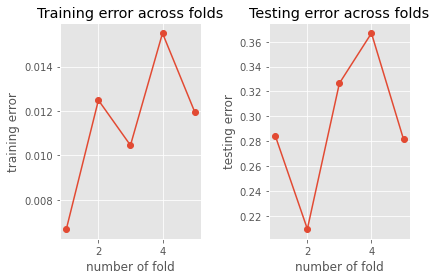

In [21]:
plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_training_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('training error')
plt.title('Training error across folds')
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(range(1, kf.get_n_splits() + 1), np.array(list_testing_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('testing error')
plt.title('Testing error across folds')
plt.tight_layout()
plt.show()